In [1]:
import patchseq_utils.analysis as utils
from patchseq_utils import plotting as plot
import pandas as pd
from pandas.api.types import CategoricalDtype
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os.path
import glob
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
# fix slow autocomplete
%config Completer.use_jedi = False

pd.set_option('use_inf_as_na', True)
pd.options.display.max_columns=300
pd.options.display.max_rows=300
sns.set(style='ticks', context='talk')
from importlib import reload

/local1/storage/envs/ipfx38/lib/python3.8/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
from patchseq_utils import l1_load
from patchseq_utils import util
from importlib import reload
reload(l1_load)
reload(util)

<module 'patchseq_utils.util' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/util.py'>

In [3]:
from patchseq_utils.l1_load import *
from patchseq_utils.util import *

# Cluster distinctness

In [41]:
reload(utils)

<module 'patchseq_utils.analysis' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/analysis.py'>

### Ephys

In [39]:
complete_data, clusters = subset_data(human_df, ephys_features, ephys_frac_min=0, cluster_min=0)
# replace with min across groups?
complete_features = subset_features(complete_data, ephys_features, complete_frac=0.4)
data = complete_data.query('l1_type')
data['homology_type'].cat.remove_unused_categories(inplace=True)
data['homology_type'].value_counts(sort=False)

PAX6      64
LAMP5    157
MC4R      57
VIP       28
other     27
Name: homology_type, dtype: int64

In [40]:
group_col = 'homology_type'
features = complete_features
subset = complete_data.query('core_l1_type').copy()
subset['homology_type'].cat.remove_unused_categories(inplace=True)
res = utils.run_kw_dunn(subset, features, group_col)
# res.to_csv('data/ephys_kw_posthoc_dunn.csv')
res.head(10)

,KW_H,pval,rsquared,pairs,ipairs,pair_count
feature,,,,,,
sag,149.115046,4.007650e-30,0.541167,"[PAX6 - LAMP5, PAX6 - MC4R, PAX6 - VIP, LAMP5 ...","[01, 02, 03, 12, 13]",5
upstroke_adapt_ratio,109.512982,6.844470e-22,0.398925,"[PAX6 - LAMP5, PAX6 - MC4R, LAMP5 - MC4R, LAMP...","[01, 02, 12, 13, 23]",5
sag_area,91.961113,2.172527e-18,0.340847,"[PAX6 - LAMP5, PAX6 - MC4R, PAX6 - VIP, LAMP5 ...","[01, 02, 03, 12, 13]",5
sag_peak_t,91.828401,2.172527e-18,0.328994,"[PAX6 - LAMP5, PAX6 - MC4R, PAX6 - VIP, LAMP5 ...","[01, 02, 03, 12]",4
threshold_v_adapt_ratio,89.981455,4.333078e-18,0.325773,"[PAX6 - MC4R, PAX6 - VIP, LAMP5 - MC4R, LAMP5 ...","[02, 03, 12, 13]",4
downstroke_adapt_ratio,75.437744,4.768237e-15,0.271302,"[PAX6 - LAMP5, PAX6 - MC4R, LAMP5 - MC4R, LAMP...","[01, 02, 12, 13, 23]",5
width_adapt_ratio,75.081591,4.872452e-15,0.275121,"[PAX6 - LAMP5, PAX6 - MC4R, LAMP5 - MC4R, LAMP...","[01, 02, 12, 13]",4
isi_norm_sq_var_hero,73.991769,7.299855e-15,0.279495,"[PAX6 - LAMP5, LAMP5 - MC4R, LAMP5 - VIP]","[01, 12, 13]",3
fast_trough_v_adapt_ratio,57.440267,2.253767e-11,0.206997,"[PAX6 - MC4R, LAMP5 - MC4R, MC4R - VIP]","[02, 12, 23]",3


In [5]:
from itertools import combinations
pairs = list(combinations(['PAX6', 'LAMP5', 'MC4R', 'VIP'],2))

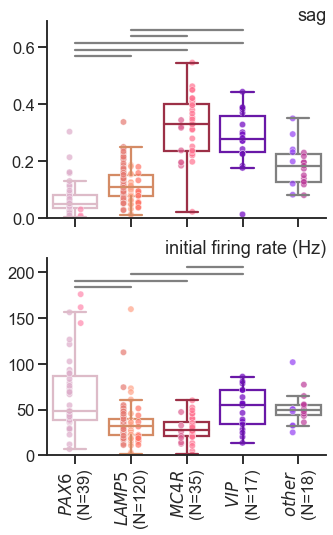

In [50]:
features = ['sag', 'first_isi_inv_hero']
labels = ['sag', 'initial firing rate (Hz)']
utils.plot_boxplot_multiple(data, features, labels=labels, x='homology_type', x_fine=cluster, palette_fine=palette_human, palette=palette_subclass,
                                   pairs_sets=[pairs], legend=False, figsize=(5,8))


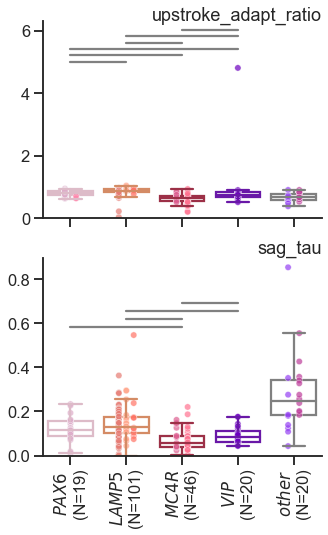

In [38]:
features = ['upstroke_adapt_ratio', 'sag_tau']
utils.plot_boxplot_multiple(data, features, x='homology_type', x_fine=cluster, palette_fine=palette_human, palette=palette_subclass,
                                   pairs_sets=[pairs], legend=False, figsize=(5,8))


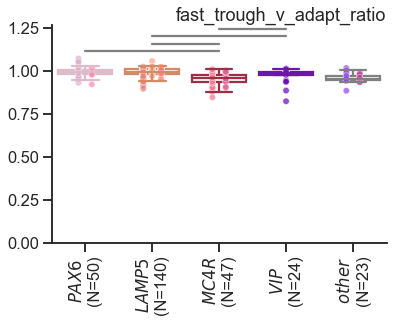

In [41]:
f = 'fast_trough_v_adapt_ratio'
utils.plot_box_cluster_feature(data, f, 'homology_type', x_fine=cluster, palette_fine=palette_human, palette=palette_subclass,
                                   pairs_sets=[pairs])

plt.legend().remove()

(-0.5, 4.5)
(-0.5, 4.5)


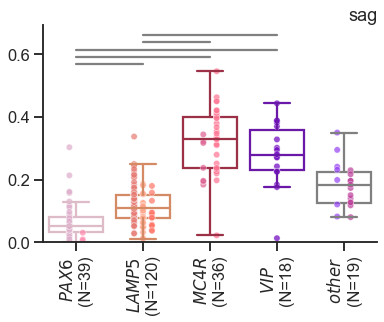

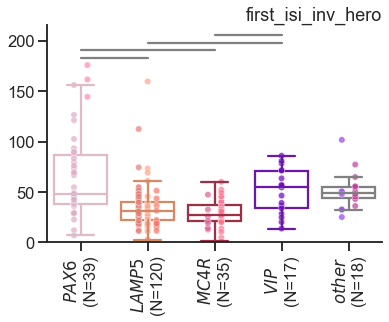

In [39]:
features = ['sag', 'first_isi_inv_hero']
for f in features:
    utils.plot_box_cluster_feature(data, f, 'homology_type', x_fine=cluster, palette_fine=palette_human, palette=palette_subclass,
                                   pairs_sets=[pairs])
    plt.legend().remove()
    print(plt.xlim())

### Morpho

In [8]:
complete_data, clusters = subset_data(human_df, morph_features, ephys_frac_min=0, cluster_min=0)
data = complete_data.query('l1_type')
data['homology_type'].cat.remove_unused_categories(inplace=True)
data['homology_type'].value_counts(sort=False)

PAX6     21
LAMP5    34
MC4R     12
VIP       5
other     7
Name: homology_type, dtype: int64

In [9]:
group_col = 'homology_type'
features = morph_features
subset = complete_data.query('core_l1_type').copy()
subset['homology_type'].cat.remove_unused_categories(inplace=True)
res = run_kw_dunn(subset, features, group_col)
# res.to_csv('data/morph_kw_posthoc_dunn.csv')
res

,KW_H,pval,pairs,ipairs,pair_count
feature,,,,,
basal_dendrite_calculate_number_of_stems,35.674738,0.000004,"[PAX6 - LAMP5, LAMP5 - MC4R, LAMP5 - VIP]","[01, 12, 13]",3
basal_dendrite_soma_percentile_y,25.104309,0.000374,"[PAX6 - MC4R, PAX6 - VIP, LAMP5 - MC4R, LAMP5 ...","[02, 03, 12, 13]",4
axon_extent_x,22.903682,0.000719,"[PAX6 - MC4R, LAMP5 - MC4R, MC4R - VIP]","[02, 12, 23]",3
axon_frac_above_basal_dendrite,21.548889,0.001032,"[PAX6 - MC4R, LAMP5 - MC4R, MC4R - VIP]","[02, 12, 23]",3
axon_mean_contraction,20.178764,0.001590,[PAX6 - LAMP5],[01],1
basal_dendrite_bias_y,17.694596,0.003854,"[PAX6 - MC4R, LAMP5 - MC4R]","[02, 12]",2
axon_frac_below_basal_dendrite,17.611322,0.003854,"[PAX6 - MC4R, LAMP5 - MC4R]","[02, 12]",2
axon_bias_x,16.923008,0.004673,"[PAX6 - MC4R, PAX6 - VIP, LAMP5 - MC4R]","[02, 03, 12]",3
basal_dendrite_num_branches,15.923291,0.006663,"[PAX6 - LAMP5, LAMP5 - MC4R, LAMP5 - VIP]","[01, 12, 13]",3


In [12]:
reload(utils)

<module 'patchseq_utils.analysis' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/analysis.py'>

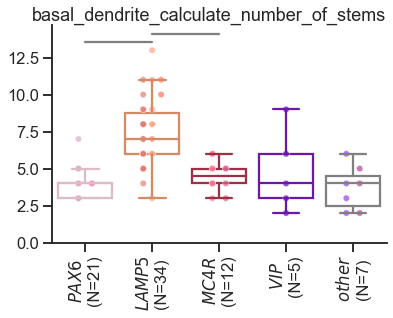

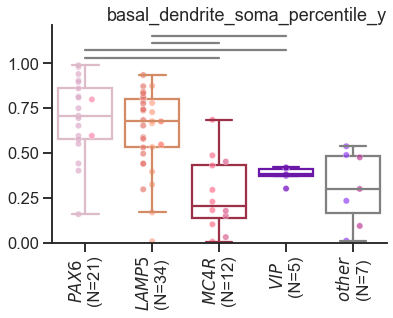

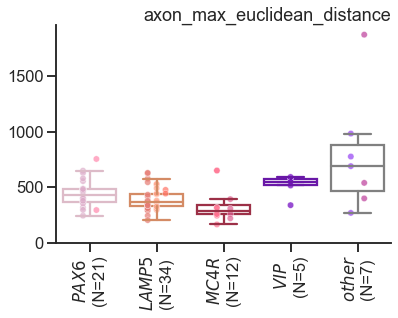

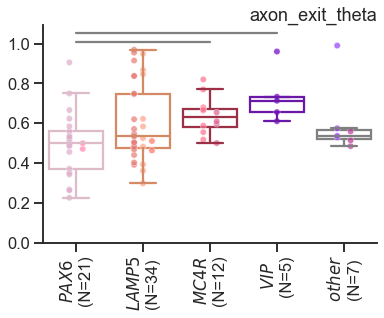

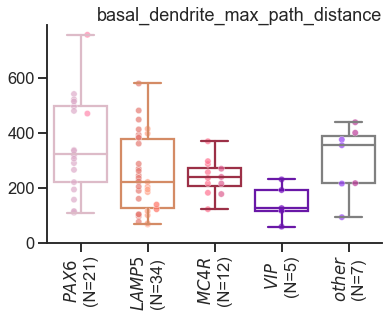

In [13]:
features = ['basal_dendrite_calculate_number_of_stems', 
            'basal_dendrite_soma_percentile_y',
            'axon_max_euclidean_distance', 
            'axon_exit_theta',
           'basal_dendrite_max_path_distance']
for f in features:
    utils.plot_box_cluster_feature(data, f, 'homology_type', x_fine=cluster, palette_fine=palette_human, palette=palette_subclass,
                                   pairs_sets=[pairs], legend=None) 

In [46]:
reload(utils)

<module 'patchseq_utils.analysis' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/analysis.py'>

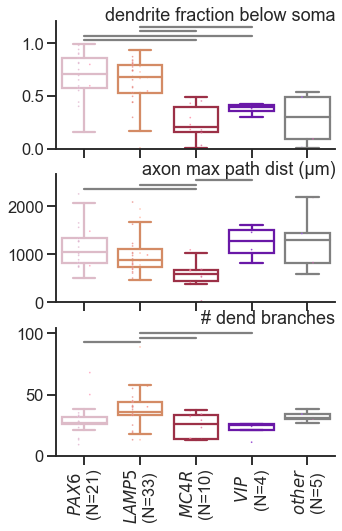

In [47]:
features = [
    'basal_dendrite_soma_percentile_y', 
    # 'axon_extent_x',
    'axon_max_path_distance', 
    'basal_dendrite_num_branches']
labels = [
    'dendrite fraction below soma', 
    # 'axon x extent (μm)', 
    'axon max path dist (μm)', 
    '# dend branches']
utils.plot_boxplot_multiple(data, features, labels=labels, x='homology_type', x_fine=cluster, palette_fine=palette_human, palette=palette_subclass,
                                   pairs_sets=[pairs], legend=False, figsize=(5,8))


No handles with labels found to put in legend.


Text(0, 0.5, 'axon max distance')

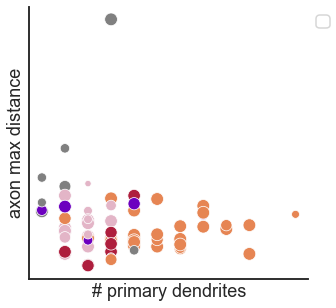

In [8]:
from plotting import *
plot_scatter(data=complete_data, x='basal_dendrite_calculate_number_of_stems', y='axon_max_euclidean_distance',
             hue='homology_type', size='topLeafValue', palette=palette_subclass,
             figsize=(5,5), legend=False)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left')
plt.xlabel('# primary dendrites')
plt.ylabel('axon max distance')

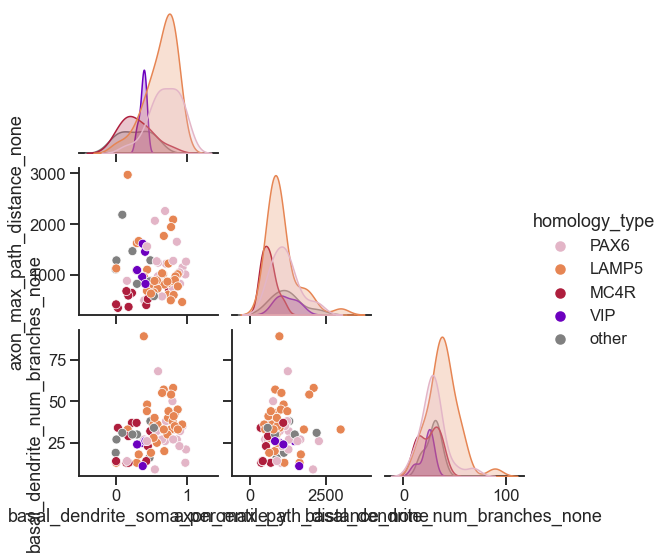

In [15]:
sns.pairplot(data, hue='homology_type', palette=palette_subclass, vars=features, corner=True)

## Mouse

### Ephys

In [20]:
complete_data, clusters = subset_data(mouse_df, ephys_features, ephys_frac_min=0, cluster_min=0)
# replace with min across groups?
complete_features = subset_features(complete_data, ephys_features, complete_frac=0.4)
data = complete_data.query('l1_type')
data['homology_type'].cat.remove_unused_categories(inplace=True)
data['homology_type'].value_counts(sort=False)

PAX6       5
LAMP5    351
MC4R      93
VIP       90
Name: homology_type, dtype: int64

In [30]:
group_col = 'homology_type'
features = complete_features
res = run_kw_dunn(data, features, group_col, fdr_method=None)
# res.to_csv('data/ephys_kw_posthoc_dunn.csv')
res.head(20)

,KW_H,pval,pairs,ipairs,pair_count
feature,,,,,
tau,262.264292,1.455422e-56,"[PAX6 - MC4R, MC4R - LAMP5, MC4R - VIP, LAMP5 ...","[01, 12, 13, 23]",4
trough_deltav_hero,251.621812,2.917747e-54,"[PAX6 - MC4R, MC4R - LAMP5, MC4R - VIP, LAMP5 ...","[01, 12, 13, 23]",4
input_resistance,248.134669,1.656780e-53,"[PAX6 - MC4R, MC4R - LAMP5, MC4R - VIP, LAMP5 ...","[01, 12, 13, 23]",4
first_isi_inv_hero,247.582456,2.181204e-53,"[PAX6 - MC4R, MC4R - LAMP5, MC4R - VIP, LAMP5 ...","[01, 12, 13, 23]",4
postap_slope_hero,237.024049,4.188311e-51,"[PAX6 - MC4R, MC4R - LAMP5, MC4R - VIP, LAMP5 ...","[01, 12, 13, 23]",4
trough_slowdeltav_hero,231.426860,6.796845e-50,"[MC4R - LAMP5, MC4R - VIP, LAMP5 - VIP]","[12, 13, 23]",3
fast_trough_deltav_hero,225.859134,1.086629e-48,"[PAX6 - MC4R, MC4R - LAMP5, MC4R - VIP, LAMP5 ...","[01, 12, 13, 23]",4
input_resistance_ss,225.099077,1.586354e-48,"[MC4R - LAMP5, MC4R - VIP, LAMP5 - VIP]","[12, 13, 23]",3
adapt_mean,212.012801,1.069450e-45,"[PAX6 - MC4R, MC4R - LAMP5, MC4R - VIP, LAMP5 ...","[01, 12, 13, 23]",4


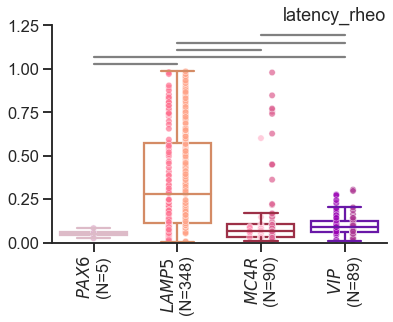

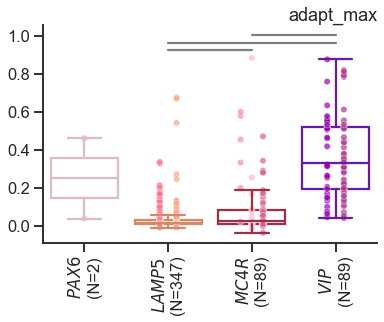

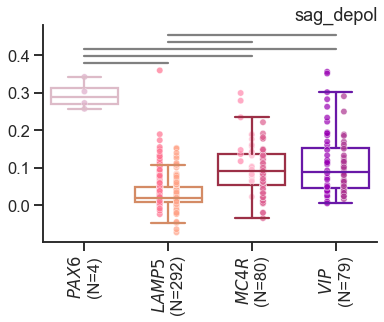

In [37]:
features = [
    'latency_rheo',
    'adapt_max',
    'sag_depol'
]
for f in features:
    utils.plot_box_cluster_feature(data, f, 'homology_type', x_fine=cluster, palette_fine=palette_mouse, palette=palette_subclass,
                                   pairs_sets=[pairs], legend=None) 

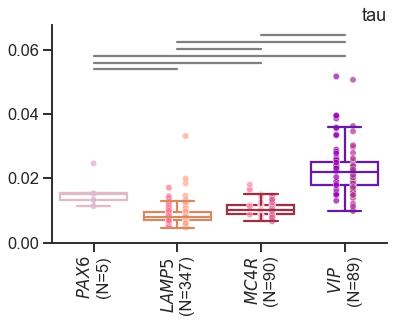

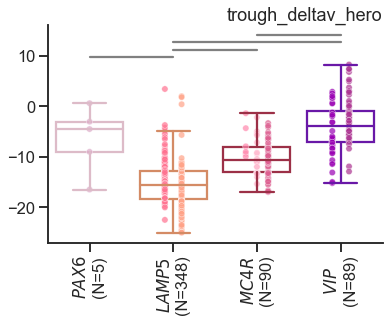

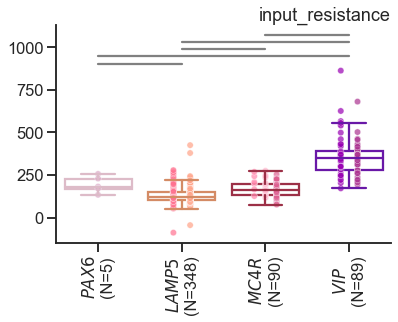

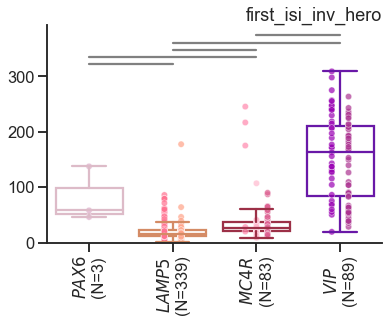

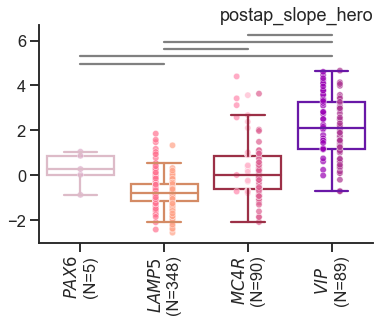

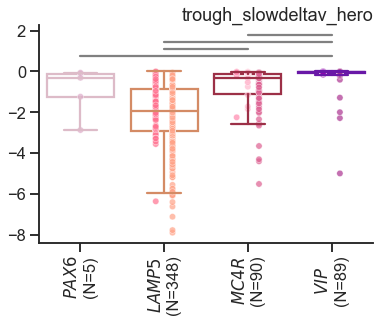

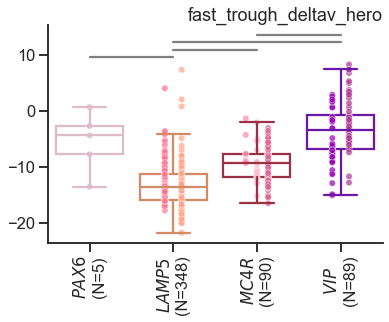

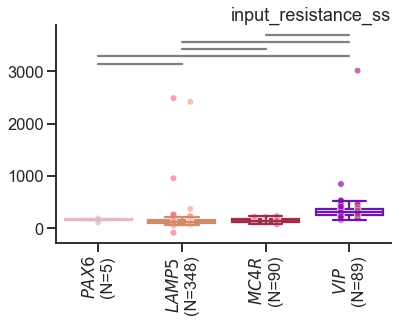

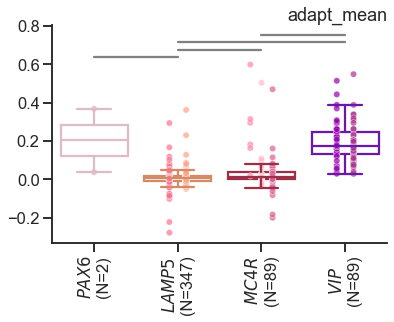

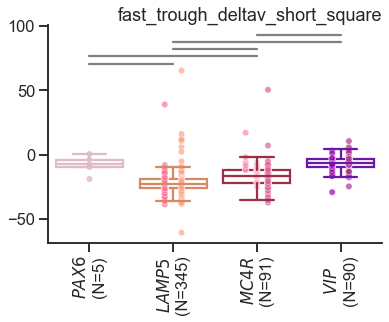

In [27]:

for f in res.index[:10]:
    utils.plot_box_cluster_feature(data, f, 'homology_type', x_fine=cluster, palette_fine=palette_mouse, palette=palette_subclass,
                                   pairs_sets=[pairs], legend=None) 

### Morpho

In [14]:
complete_data, clusters = subset_data(mouse_df, morph_features, ephys_frac_min=0, cluster_min=0)
data = complete_data.query('l1_type')
data['homology_type'].cat.remove_unused_categories(inplace=True)
data['homology_type'].value_counts(sort=False)

PAX6      1
LAMP5    43
MC4R     18
VIP      15
Name: homology_type, dtype: int64

In [15]:
group_col = 'homology_type'
features = morph_features
subset = complete_data.query('core_l1_type').copy()
subset['homology_type'].cat.remove_unused_categories(inplace=True)
res = run_kw_dunn(subset, features, group_col)
# res.to_csv('data/morph_kw_posthoc_dunn.csv')
res

,KW_H,pval,pairs,ipairs,pair_count
feature,,,,,
basal_dendrite_frac_above_axon,48.339725,9.194860e-09,"[MC4R - VIP, LAMP5 - VIP]","[13, 23]",2
basal_dendrite_frac_intersect_axon,30.748398,2.448802e-05,"[MC4R - LAMP5, MC4R - VIP]","[12, 13]",2
axon_num_branches,28.711007,4.009090e-05,"[MC4R - LAMP5, MC4R - VIP]","[12, 13]",2
basal_dendrite_num_branches,28.244503,4.009090e-05,"[MC4R - LAMP5, MC4R - VIP]","[12, 13]",2
axon_frac_above_basal_dendrite,27.836591,4.009090e-05,"[MC4R - LAMP5, MC4R - VIP, LAMP5 - VIP]","[12, 13, 23]",3
basal_dendrite_extent_x,26.750406,4.990243e-05,"[MC4R - LAMP5, MC4R - VIP]","[12, 13]",2
axon_soma_percentile_y,26.686409,4.990243e-05,"[PAX6 - VIP, MC4R - VIP, LAMP5 - VIP]","[03, 13, 23]",3
axon_emd_with_basal_dendrite,25.493911,7.759544e-05,"[MC4R - VIP, LAMP5 - VIP]","[13, 23]",2
basal_dendrite_calculate_number_of_stems,23.199372,2.079520e-04,"[MC4R - VIP, LAMP5 - VIP]","[13, 23]",2


In [12]:
reload(utils)

<module 'patchseq_utils.analysis' from '/home/tom.chartrand/work/patchseq_human_L1/patchseq_utils/analysis.py'>

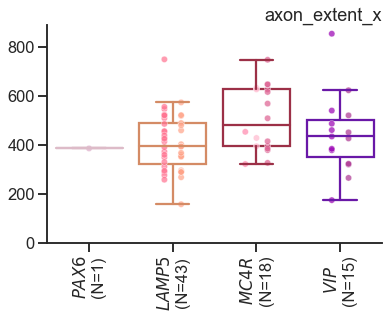

In [17]:
features = [
    'axon_extent_x'
]
for f in features:
    utils.plot_box_cluster_feature(data, f, 'homology_type', x_fine=cluster, palette_fine=palette_mouse, palette=palette_subclass,
                                   pairs_sets=[pairs], legend=None) 

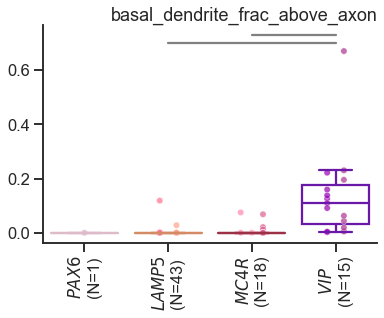

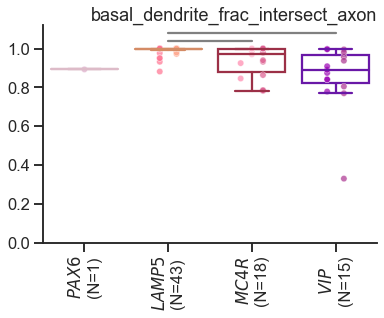

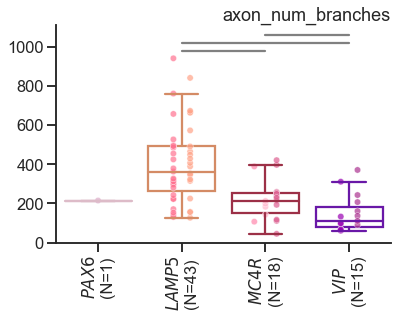

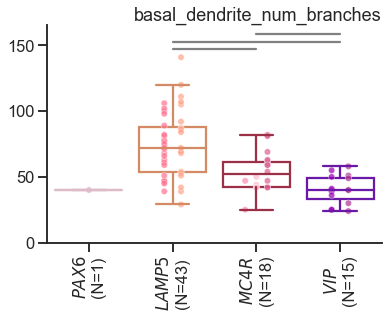

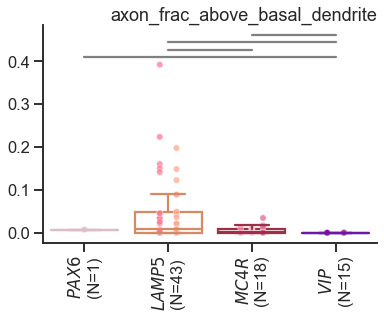

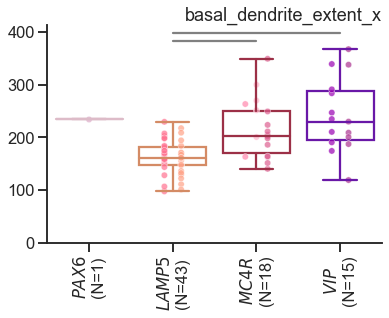

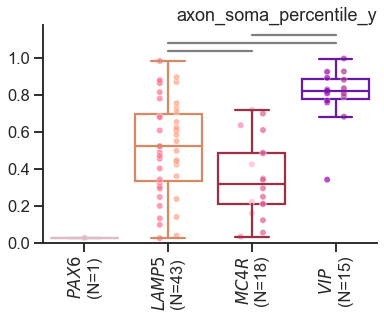

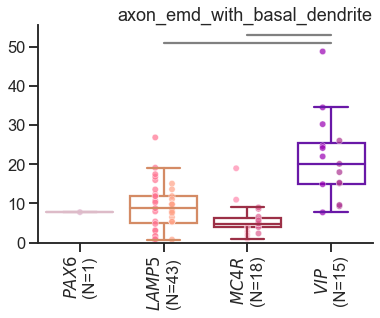

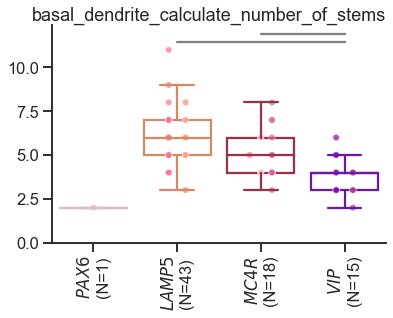

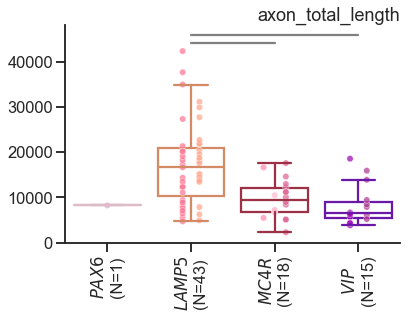

In [16]:

for f in res.index[:10]:
    utils.plot_box_cluster_feature(data, f, 'homology_type', x_fine=cluster, palette_fine=palette_mouse, palette=palette_subclass,
                                   pairs_sets=[pairs], legend=None) 